In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# Function to load and preprocess images
def load_and_preprocess_data(data_dir, img_size=(150, 150)):
    images = []
    labels = []

    for folder_name in os.listdir(data_dir):
        folder_path = os.path.join(data_dir, folder_name)
        # Skip if it's not a directory
        if not os.path.isdir(folder_path):
            continue
        if folder_name == 'helmet':  # Assuming 'helmet' folder contains images of people wearing helmets
            label = 1
        else:
            label = 0  # Assuming other folders contain images of people not wearing helmets

        for filename in os.listdir(folder_path):
            # Skip hidden files
            if filename.startswith('.'):
                continue
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess data
data_dir = '/Users/csshreejit/Desktop/data/'
images, labels = load_and_preprocess_data(data_dir)

# Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Print shapes to verify
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (22, 150, 150, 3)
Testing data shape: (6, 150, 150, 3)
Training labels shape: (22,)
Testing labels shape: (6,)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_model(input_shape):
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Adding dropout for regularization
    model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

    return model

# Set input image dimensions
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)  # Assuming RGB images

# Create the model
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

In [8]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
50/50 [==============================] - 3s 69ms/step - loss: 3.3625e-35 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
50/50 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
50/50 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
50/50 [==============================] - 3s 68ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
50/50 [==============================] - 4s 73ms/step - loss: 1.5142e-28 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
50/50 [==============================] - 3s 70ms/step - loss: 1.8324e-33 - accuracy: 1.0000 - v

In [9]:
# Evaluate the model on validation data
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

5/5 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Test Loss: 0.0
Test Accuracy: 1.0


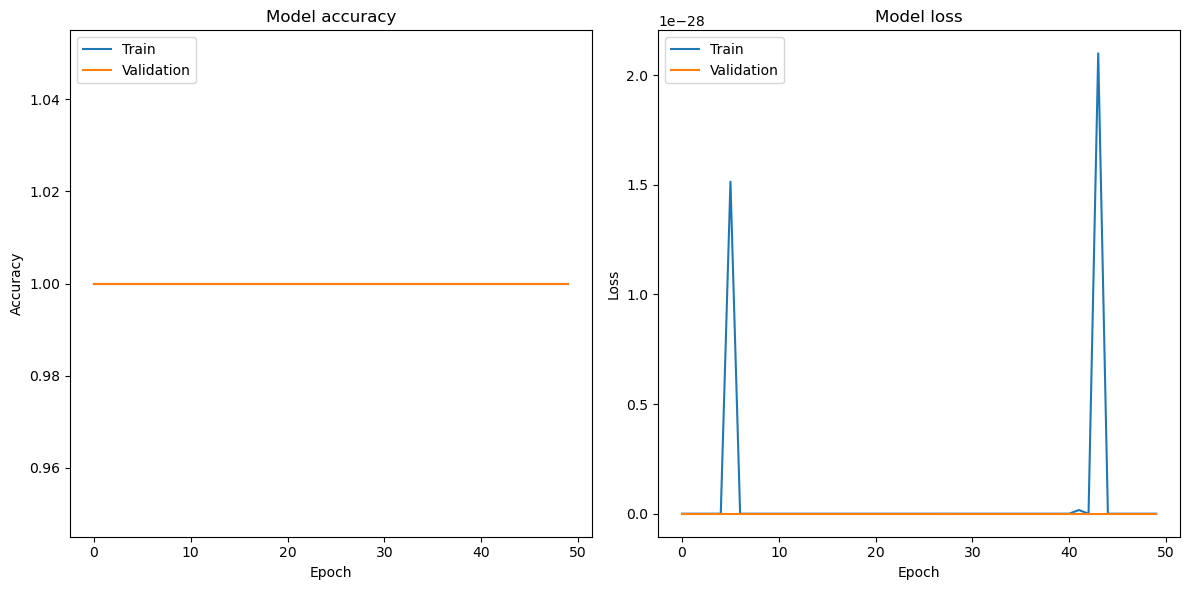

In [10]:
import matplotlib.pyplot as plt

# Create subplots for accuracy and loss
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [13]:
# Function to preprocess an image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))  # Resize the image to match the input shape of your model
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Path to the image you want to make prediction on
image_path = '/Users/harsha/Desktop/data/img1.jpg'  # Replace this with the full path to your image file

# Preprocess the image
processed_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(processed_image)

# Interpret predictions
if predictions[0][0] > 0.5:  # Assuming 0.5 as the threshold
    print("Person is wearing a helmet.")
else:
    print("Person is not wearing a helmet.")

[ WARN:0@968.839] global loadsave.cpp:248 findDecoder imread_('/Users/harsha/Desktop/data/img1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.9.0) /Users/xperience/GHA-OpenCV-Python2/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
